In [2]:
### imports ###
import pygmt
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.image as mpimg 
from mpl_toolkits.basemap import Basemap

from shapely.geometry import Polygon

import pandas as pd

%matplotlib inline
%matplotlib widget

In [3]:
# Major tectonic blocks and faults are marked by black lines (after Styron et al. (2010) and Taylor and An Yin (2009))
# https://github.com/HimaTibetMap/HimaTibetMap/tree/master
# Styron, R., Taylor, M., and Okoronkwo, K., 2010, HimaTibetMap-1.0: new ‘web-2.0’ online database of active structures from the Indo-Asian collision, Eos, vol.91 no. 20.
# Taylor, Michael, and An Yin, 2009, "Active structures of the Himalayan-Tibetan orogen and their relationships to earthquake distribution, contemporary strain field, and Cenozoic volcanism." Geosphere vol. 5, no. 3, pp 199-214.
# gem_active_faults.gmt https://github.com/GEMScienceTools/gem-global-active-faults
# Slab contours are from the slab model of Hayes et al. (2018).
# Hayes, G., 2018, Slab2 - A Comprehensive Subduction Zone Geometry Model: U.S. Geological Survey data release, https://doi.org/10.5066/F7PV6JNV. 

# Seismicity from the Harvard CMT cffatalogue (Dziewonski et al. (1981), Ekstr ̈om et al. (2012), https://www.globalcmt.org/.
# InSAR DURATION ONLY 20160309 20240710


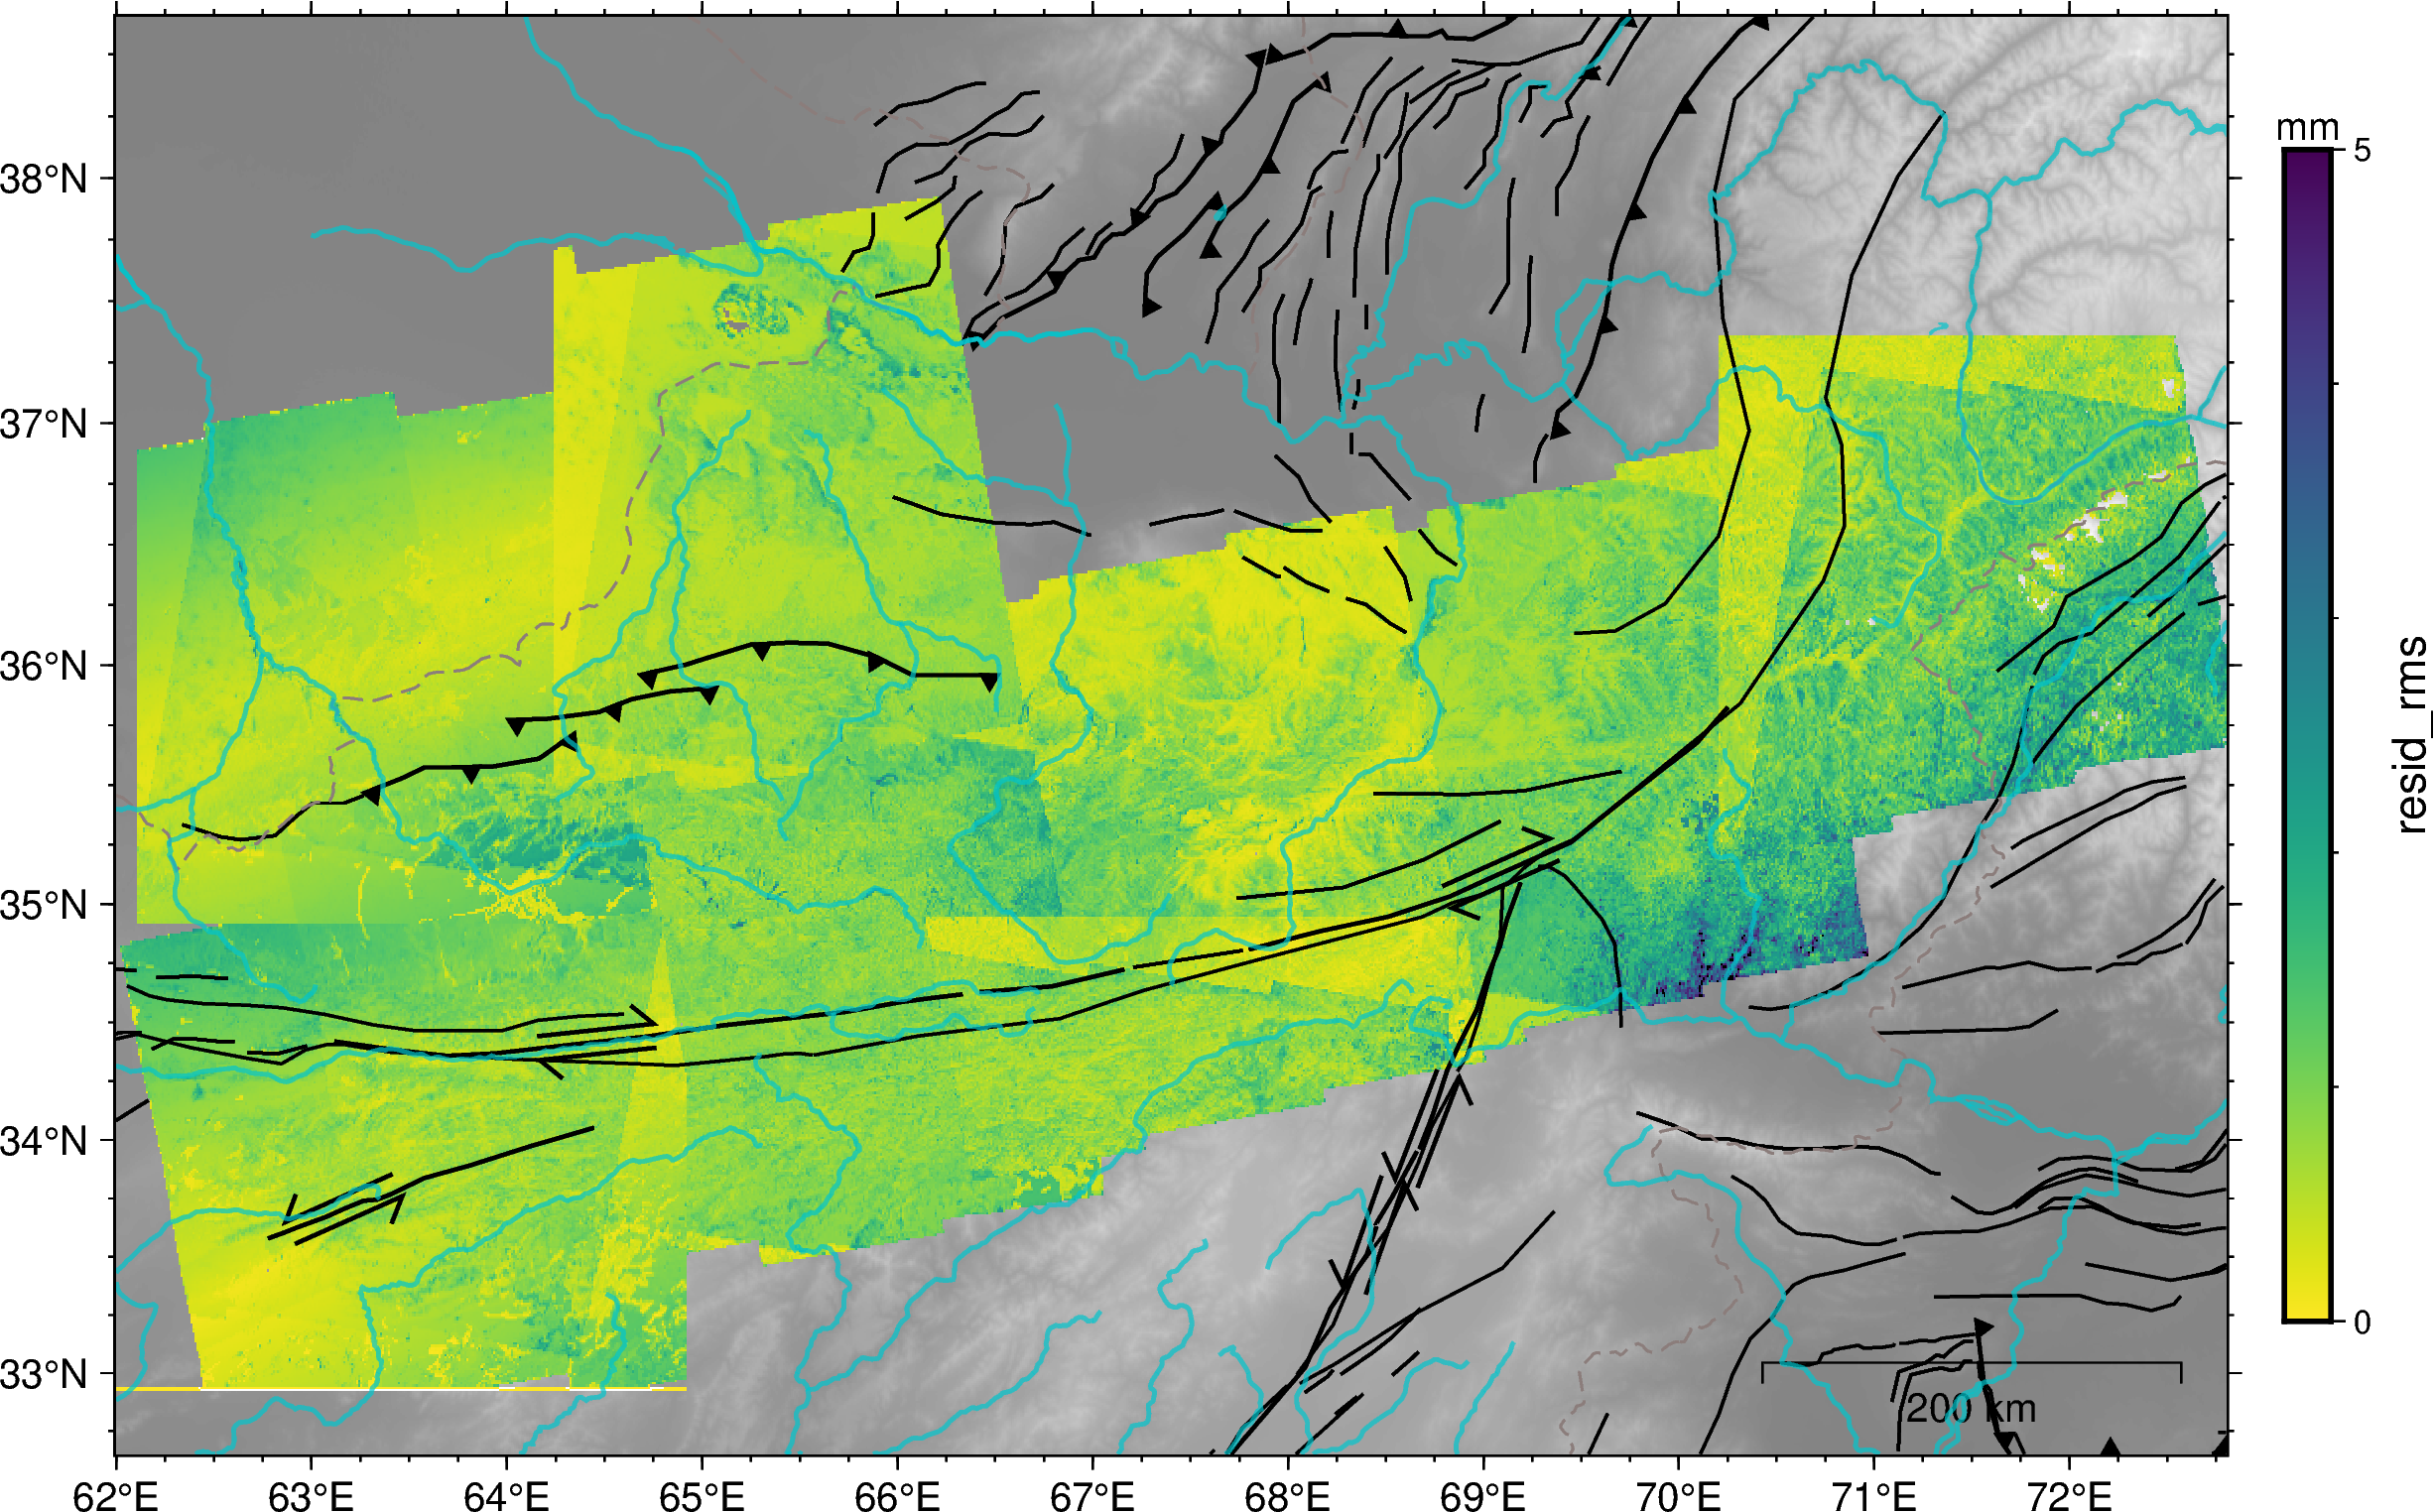

In [3]:
### GMT basemap ###
import os
dir = "/Users/rochelle/Documents/GitHub/Leeds-Research-Internship/"
os.chdir(dir)

###########################################
## Specify coords
# llcrnrlat,llcrnrlon, urcrnrlat, urcrnrlon
# are the lat/lon values of the lower left and upper right corners of the map

llcrnrlon=62 # lower left corner longitude 
llcrnrlat=32.65 # lower left corner latitude
urcrnrlon=72.8 # upper right corner longitude
urcrnrlat=38.65 # upper right corner latitude


proj_scale_w = 18 # specify projection scale (width)
proj_scale_unit = "c" # choose between c (cm) and i (inches)
# 17.78c = 7i

proj_subplot_scale = 2.3

meca_trans = 22 # meca transparency
meca_scale = "0.4c" # meca scale

# InSAR_tif =
# InSAR_NetCDF =


###########################################

centerlon = (urcrnrlon - llcrnrlon)/2 + llcrnrlon # midpoints
centerlat = (urcrnrlat - llcrnrlat)/2 + llcrnrlat
region=[llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat]


fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain", FONT="Helvetica") # figure config (borders)

                
fig.coast(region=region,\
        projection="M%s/%s/%s%s" % (centerlon, urcrnrlat, proj_scale_w, proj_scale_unit),\
        water="white", land="grey", shorelines="1/0.5p",\
        frame=["WSne", "a1f0.25"])

        # Mercator
        # a2f0.5 --> major ticks every 2 and minor ticks every 0.5
        # use ? for subplot so it automatically determines map width


grid = pygmt.datasets.load_earth_relief("30s", registration="gridline", region=region)

fig.grdimage(grid=grid, cmap="bin/cpt/custom/seabluelandgrey.cpt")
# fig.grdimage(grid=grid, cmap="geo")

#######################
pygmt.makecpt(output="bin/cpt/viridis_resid_rms", series=[0, 5], cmap="bin/cpt/GMT_supported/viridis.cpt", reverse=True)
            # redefine scale + inverse
            # stored in local sesh


pairs = ["071A_05440_131313_078D_05435_131313",
         "144A_05476_141414_151D_05440_131313",
         "173A_05350_131313_005D_05398_131313",
         "042A_05535_131313_049D_05534_131313",
         "115A_05608_131313_122D_05571_131313",
         "115A_05409_131313_122D_05372_131313",
         "042A_05336_131313_049D_05335_131313",
         "144A_05476_141414_151D_05639_131313"
         ]
for i in range(len(pairs)):
    fig.grdimage(grid="bin/13-8-24_results/resid_rms/" + pairs[i] +".resid_rms.geo.tif",\
                    nan_transparent = True, transparency = 0, cmap="bin/cpt/viridis_resid_rms")

#######################

## plotting faults
# https://www.pygmt.org/dev/gallery/lines/linefronts.html
fig.plot(data="bin/faults/HimaTibetMap.gmt", pen=f"0.7p,black") # all faults
fig.plot(data="bin/faults/gem_active_faults.gmt", pen=f"0.7p,black") # gem
fig.plot(data="bin/faults/normal.gmt", style="f1c/0.13c+l+b", pen=f"0.95p,black", fill="black") # normal
fig.plot(data="bin/faults/thrust.gmt", style="f1c/0.13c+l+t", pen=f"0.95p,black", fill="black") # thrust
fig.plot(data="bin/faults/dextral.gmt", style="f5c/1c+r+s45+o2.25c", pen=f"0.95p,black", fill="black") # dextral (right)
fig.plot(data="bin/faults/sinistral.gmt", style="f5c/1c+l+s45+o2.25c", pen=f"0.95p,black", fill="black") # sinistral (left)

fig.coast(map_scale="g71.5/33+w200k", shorelines="1/0.5p", borders="1/0.6p, mistyrose4,-")
fig.coast(lakes="turquoise3", rivers="a/1p,turquoise3,4_solid", water="turquoise3", transparency=30) # want water above national borders

'''
## plotting poly.txt
fig.plot(data="bin/metadata/ascending/071A_05440_131313-poly.txt", pen=f"1.5p,brown2") # 071A_05440_131313
fig.plot(data="bin/metadata/descending/078D_05435_131313-poly.txt", pen=f"1.5p,royalblue") # 078D_05435_131313
'''

## legends and stuff

fig.colorbar(
    cmap="bin/cpt/viridis_resid_rms", frame=["xa5f1+lresid_rms", "y+lmm"],
    # offset (+o) by 0.5 cm horizontally and 0.8 cm vertically from anchor
    # point, and plotted horizontally (+h)
    position="JCR+o0.5/0c+w10c")



fig.show()
fig.savefig("figures/frame_merge_map_resid_rms.png")